In [917]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [918]:
df = pd.read_csv('weatherAUS.csv')

In [919]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,No
1,7/3/2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4,No


In [920]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36543 non-null  float64
 3   MaxTemp        36639 non-null  float64
 4   Rainfall       36255 non-null  float64
 5   Evaporation    24035 non-null  float64
 6   Sunshine       23317 non-null  float64
 7   WindGustDir    33513 non-null  object 
 8   WindGustSpeed  33520 non-null  float64
 9   WindDir9am     34072 non-null  object 
 10  WindDir3pm     35919 non-null  object 
 11  WindSpeed9am   36219 non-null  float64
 12  WindSpeed3pm   36235 non-null  float64
 13  Humidity9am    36311 non-null  float64
 14  Humidity3pm    36370 non-null  float64
 15  Pressure9am    33309 non-null  float64
 16  Pressure3pm    33329 non-null  float64
 17  Cloud9am       24381 non-null  float64
 18  Cloud3

<Axes: >

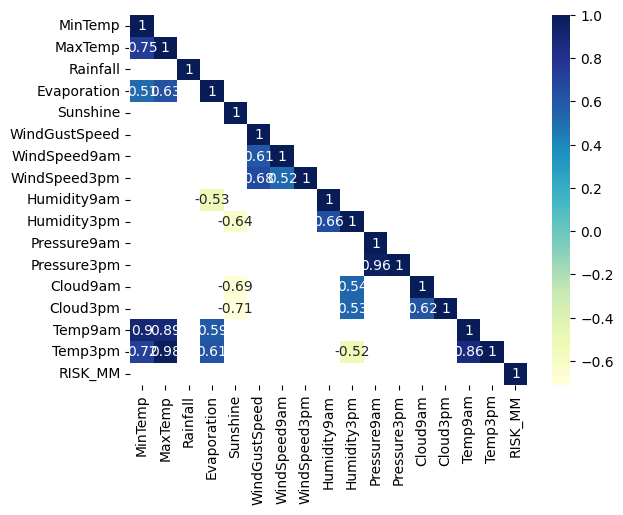

In [921]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
mask[corr.abs()<0.5] = True
sns.heatmap(corr, mask=mask,cmap="YlGnBu", annot=True)

In [922]:
df.RainToday.value_counts(normalize=True)

RainToday
No     0.765577
Yes    0.234423
Name: proportion, dtype: float64

In [923]:
df.RainTomorrow.value_counts(normalize=True)

RainTomorrow
No     0.764789
Yes    0.235211
Name: proportion, dtype: float64

In [924]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
RainTomorrow       620
dtype: int64

In [925]:
df.dropna(inplace=True)

In [926]:
df2 = df[['Location', 'WindGustDir', 'WindGustSpeed', 'Humidity9am','Pressure9am', 'Temp9am', 'Rainfall', 'Sunshine', 'Humidity3pm', 'Cloud3pm', 'Pressure3pm', 'RainToday']]

In [927]:
numeric_features = ['WindGustSpeed', 'Humidity9am', 'Pressure9am', 'Temp9am', 'Rainfall', 'Sunshine', 'Humidity3pm', 'Cloud3pm', 'Pressure3pm']

for col in numeric_features:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR
    df2 = df2[(df2[col] >= min) & (df2[col] <= max)]

In [928]:
df2.head()

,Location,WindGustDir,WindGustSpeed,Humidity9am,Pressure9am,Temp9am,Rainfall,Sunshine,Humidity3pm,Cloud3pm,Pressure3pm,RainToday
0,Hobart,NW,30.0,65.0,1023.1,9.1,0.0,8.9,47.0,1.0,1022.2,No
2,Williamtown,SSE,41.0,48.0,1020.9,22.7,0.0,7.2,50.0,4.0,1021.9,No
3,PerthAirport,SW,54.0,50.0,1018.3,20.0,0.0,11.3,41.0,1.0,1014.9,No
6,Nuriootpa,SE,35.0,53.0,1017.8,15.5,0.0,10.5,29.0,4.0,1013.9,No
8,Townsville,E,57.0,53.0,1020.9,27.4,0.0,10.8,48.0,2.0,1018.0,No


In [929]:
categorical_variables = ['Location', 'WindGustDir', 'RainToday']
df2 = pd.get_dummies(df2, columns = categorical_variables)

In [930]:
df2

,WindGustSpeed,Humidity9am,Pressure9am,Temp9am,Rainfall,Sunshine,Humidity3pm,Cloud3pm,Pressure3pm,Location_AliceSprings,...,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,RainToday_No,RainToday_Yes
0,30.0,65.0,1023.1,9.1,0.0,8.9,47.0,1.0,1022.2,False,...,False,False,False,False,False,False,False,False,True,False
2,41.0,48.0,1020.9,22.7,0.0,7.2,50.0,4.0,1021.9,False,...,False,False,True,False,False,False,False,False,True,False
3,54.0,50.0,1018.3,20.0,0.0,11.3,41.0,1.0,1014.9,False,...,False,False,False,False,True,False,False,False,True,False
6,35.0,53.0,1017.8,15.5,0.0,10.5,29.0,4.0,1013.9,False,...,False,True,False,False,False,False,False,False,True,False
8,57.0,53.0,1020.9,27.4,0.0,10.8,48.0,2.0,1018.0,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36866,20.0,41.0,1018.3,19.7,0.0,10.6,61.0,2.0,1015.0,False,...,False,True,False,False,False,False,False,False,True,False
36877,37.0,38.0,1024.2,18.4,0.0,10.6,45.0,1.0,1021.5,False,...,False,False,False,False,False,True,False,False,True,False
36878,37.0,54.0,1012.6,25.7,0.0,11.1,39.0,5.0,1009.0,False,...,False,False,False,False,False,False,False,False,True,False
36879,39.0,50.0,1023.9,16.4,0.0,11.6,41.0,1.0,1019.9,False,...,False,False,False,True,False,False,False,False,True,False


In [931]:
X = df2
Y = df.loc[df2.index, 'RainTomorrow']

In [932]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [933]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(solver='liblinear')
modelo.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [934]:
y_pred = modelo.predict(X_test)

In [935]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, Y_test)
acc

0.8800850030358227

In [936]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

          No       0.90      0.97      0.93      2807
         Yes       0.67      0.37      0.47       487

    accuracy                           0.88      3294
   macro avg       0.79      0.67      0.70      3294
weighted avg       0.86      0.88      0.86      3294

